# Seattle Airbnb Data Analysis

Airbnb is an internet marketplace for short-term home and apartment rentals. It allows you to, to rent out your home for a week while you’re away, or rent out your empty house/bedroom. One challenge that Airbnb hosts face is determining the optimal nightly rent price. In many areas, renters are presented with a good selection of listings and can filter by criteria like price, number of bedrooms, room type, and more. Since Airbnb is a market, the amount a host can charge is ultimately tied to market prices

In this notebook we answer the following questions:
* What is the seasonal pattern of Airbnb in Seattle?
* What kinds of Airbnb homes are popular?
* What are the most influential features about the rental price?


### Importing required libraries

In [1]:
%matplotlib inline


#General 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# importing libraries to plot time series
from datetime import datetime
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

### Importing Datasets

The latest datasets can be downloaded from http://insideairbnb.com/get-the-data.html

In [2]:
cal = pd.read_csv('calendar.csv')
lst = pd.read_csv('listings.csv')
rev = pd.read_csv('reviews.csv')

### Understanding the Data

In [3]:
cal.shape

(1549846, 7)

In [4]:
cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1696194,2021-09-25,f,$165.00,$165.00,30.0,1125.0
1,1696389,2021-09-25,f,$214.00,$214.00,30.0,1125.0
2,1696389,2021-09-26,f,$214.00,$214.00,30.0,1125.0
3,1696389,2021-09-27,f,$214.00,$214.00,30.0,1125.0
4,1696389,2021-09-28,f,$214.00,$214.00,30.0,1125.0


In [5]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549846 entries, 0 to 1549845
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1549846 non-null  int64  
 1   date            1549846 non-null  object 
 2   available       1549846 non-null  object 
 3   price           1549846 non-null  object 
 4   adjusted_price  1549846 non-null  object 
 5   minimum_nights  1549844 non-null  float64
 6   maximum_nights  1549844 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 82.8+ MB


In [6]:
null = cal.isna().sum()
null.sort_values(ascending=False)

minimum_nights    2
maximum_nights    2
listing_id        0
date              0
available         0
price             0
adjusted_price    0
dtype: int64

In [7]:
lst.shape

(4249, 74)

In [8]:
lst.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20210925150558,2021-09-25,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,...,5.00,4.97,4.82,STR-OPLI-19-002837,t,1,1,0,0,0.61
1,6606,https://www.airbnb.com/rooms/6606,20210925150558,2021-09-25,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,https://www.airbnb.com/users/show/14942,...,4.76,4.88,4.56,str-opli-19-002622,f,1,1,0,0,2.42
2,9419,https://www.airbnb.com/rooms/9419,20210925150558,2021-09-25,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,...,4.89,4.65,4.62,STR-OPLI-19-003039,f,9,0,9,0,1.13
3,9531,https://www.airbnb.com/rooms/9531,20210925150558,2021-09-25,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,...,4.94,4.98,4.88,STR-OPLI-19-002182,f,2,2,0,0,0.55
4,9534,https://www.airbnb.com/rooms/9534,20210925150558,2021-09-25,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,https://www.airbnb.com/users/show/31481,...,4.98,4.95,4.93,STR-OPLI-19-002182,f,2,2,0,0,0.57


In [9]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4249 non-null   int64  
 1   listing_url                                   4249 non-null   object 
 2   scrape_id                                     4249 non-null   int64  
 3   last_scraped                                  4249 non-null   object 
 4   name                                          4249 non-null   object 
 5   description                                   4239 non-null   object 
 6   neighborhood_overview                         3116 non-null   object 
 7   picture_url                                   4249 non-null   object 
 8   host_id                                       4249 non-null   int64  
 9   host_url                                      4249 non-null   o

In [10]:
null = lst.isna().sum()
null.sort_values(ascending=False)

bathrooms                4249
calendar_updated         4249
neighborhood_overview    1133
neighbourhood            1133
host_about               1064
                         ... 
minimum_nights              0
maximum_nights              0
host_verifications          0
has_availability            0
id                          0
Length: 74, dtype: int64

In [11]:
rev.shape

(273279, 6)

In [12]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


In [13]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273279 entries, 0 to 273278
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     273279 non-null  int64 
 1   id             273279 non-null  int64 
 2   date           273279 non-null  object
 3   reviewer_id    273279 non-null  int64 
 4   reviewer_name  273279 non-null  object
 5   comments       273138 non-null  object
dtypes: int64(3), object(3)
memory usage: 12.5+ MB


In [14]:
null = rev.isna().sum()
null.sort_values(ascending=False)

comments         141
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
dtype: int64

### DATA CLEANING

In [15]:
lst.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

#### STEP 1: Dropping Useless Features
There are some kinds of useless data:

- not informative: id, url, name...
- although informative, but hard to deal with: text, latitude, longitude...
- values are identical: city, state...
- values are redundent: listing count, avaliability...
- not inner features: price, reveiw...

Just drop all of them

In [16]:
df = pd.read_csv('listings.csv')
print(f"The dataset contains {len(df)} Airbnb listings")
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
#pd.set_option('display.max_rows', 100)
df.head(3)

The dataset contains 4249 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20210925150558,2021-09-25,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,90%,f,https://a0.muscache.com/im/pictures/user/016a1...,https://a0.muscache.com/im/pictures/user/016a1...,Minor,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, Washington, United States",Madrona,Central Area,47.61094,-122.29286,Entire residential home,Entire home/apt,9,NaN,2.5 baths,4.0,4.0,"[""Free parking on premises"", ""Coffee maker"", ""...",$449.00,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,NaN,t,0,0,24,204,2021-09-25,35,3,0,2017-01-10,2021-08-07,4.97,5.00,5.00,5.00,5.00,4.97,4.82,STR-OPLI-19-002837,t,1,1,0,0,0.61
1,6606,https://www.airbnb.com/rooms/6606,20210925150558,2021-09-25,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,https://www.airbnb.com/users/show/14942,Joyce,2009-04-26,"Seattle, Washington, United States",I am a therapist/innkeeper.I know my city well...,within an hour,100%,92%,f,https://a0.muscache.com/im/users/14942/profile...,https://a0.muscache.com/im/users/14942/profile...,Wallingford,5,5,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Seattle, Washington, United States",Wallingford,Other neighborhoods,47.65444,-122.33629,Entire guesthouse,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free parking on premises"", ""Coffee maker"", ""...",$99.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,0,2021-09-25,157,8,2,2016-05-30,2021-09-14,4.60,4.67,4.67,4.82,4.76,4.88,4.56,str-opli-19-002622,f,1,1,0,0,2.42
2,9419,https://www.airbnb.com/rooms/9419,20210925150558,2021-09-25,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,Angielena,2009-08-09,"Seattle, Washington, United States",I am a visual artist who is the director of ...,within a few hours,100%,87%,t,https://a0.muscache.com/im/users/30559/profile...,https://a0.muscache.com/im/users/30559/profile...,Georgetown,9,9,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, Washington, United States",Georgetown,Other neighborhoods,47.55017,-122.31937,Private room in rental u

In [17]:
df.shape

(4249, 74)

In [18]:
pd.set_option('display.max_rows', None)
df.isna().sum().sort_values(ascending=False)

bathrooms                                       4249
calendar_updated                                4249
neighborhood_overview                           1133
neighbourhood                                   1133
host_about                                      1064
license                                         1053
review_scores_value                              657
review_scores_location                           657
review_scores_communication                      657
review_scores_checkin                            657
review_scores_cleanliness                        657
review_scores_accuracy                           657
reviews_per_month                                652
review_scores_rating                             652
first_review                                     652
last_review                                      652
host_response_time                               585
host_response_rate                               585
bedrooms                                      

In [19]:
def drop(data, feat): #dataframe and feature as input
    """
    drop feature from data
    """
    new_data = data.drop(feat, axis=1)
    print('Dropping {}...'.format(feat))
    return new_data

In [20]:
# drop id
data_clean = drop(df, 'id')
data_clean = drop(data_clean, 'scrape_id')
data_clean = drop(data_clean, 'host_id')
data_clean = drop(data_clean, 'host_verifications') 

for feat in df.columns:
    # drop url
    if 'url' in feat:
        data_clean = drop(data_clean, feat)
    # drop name
    if 'name' in feat:
        data_clean = drop(data_clean, feat)

Dropping id...
Dropping scrape_id...
Dropping host_id...
Dropping host_verifications...
Dropping listing_url...
Dropping name...
Dropping picture_url...
Dropping host_url...
Dropping host_name...
Dropping host_thumbnail_url...
Dropping host_picture_url...


In [21]:
# drop texts
data_clean = drop(data_clean, 'description')
data_clean = drop(data_clean, 'neighborhood_overview')
data_clean = drop(data_clean, 'host_about')

Dropping description...
Dropping neighborhood_overview...
Dropping host_about...


In [22]:
# drop identical features
for feat in data_clean.columns:
    if len(data_clean[feat].value_counts()) <= 1:
        data_clean = drop(data_clean, feat)

Dropping bathrooms...
Dropping calendar_updated...
Dropping has_availability...


In [23]:
# only need 'neighbourhood_group_cleansed' as feature of home location
data_clean = drop(data_clean, 'neighbourhood')
data_clean = drop(data_clean, 'neighbourhood_cleansed')
data_clean = drop(data_clean, 'latitude')
data_clean = drop(data_clean, 'longitude')

Dropping neighbourhood...
Dropping neighbourhood_cleansed...
Dropping latitude...
Dropping longitude...


In [24]:
# drop all reviews
for feat in data_clean.columns:
    # drop url
    if 'review' in feat:
        data_clean = drop(data_clean, feat)

Dropping number_of_reviews...
Dropping number_of_reviews_ltm...
Dropping number_of_reviews_l30d...
Dropping first_review...
Dropping last_review...
Dropping review_scores_rating...
Dropping review_scores_accuracy...
Dropping review_scores_cleanliness...
Dropping review_scores_checkin...
Dropping review_scores_communication...
Dropping review_scores_location...
Dropping review_scores_value...
Dropping reviews_per_month...


In [25]:
# for listing count, only keep the calculated one
data_clean = drop(data_clean, 'host_listings_count')
data_clean = drop(data_clean, 'host_total_listings_count')

Dropping host_listings_count...
Dropping host_total_listings_count...


In [26]:
# keep only anual avaliability
data_clean = drop(data_clean, 'availability_30')
data_clean = drop(data_clean, 'availability_60')
data_clean = drop(data_clean, 'availability_90')

Dropping availability_30...
Dropping availability_60...
Dropping availability_90...


In [27]:
data_clean = drop(data_clean, 'host_location')
data_clean = drop(data_clean, 'host_neighbourhood') 
data_clean = drop(data_clean, 'license')

Dropping host_location...
Dropping host_neighbourhood...
Dropping license...


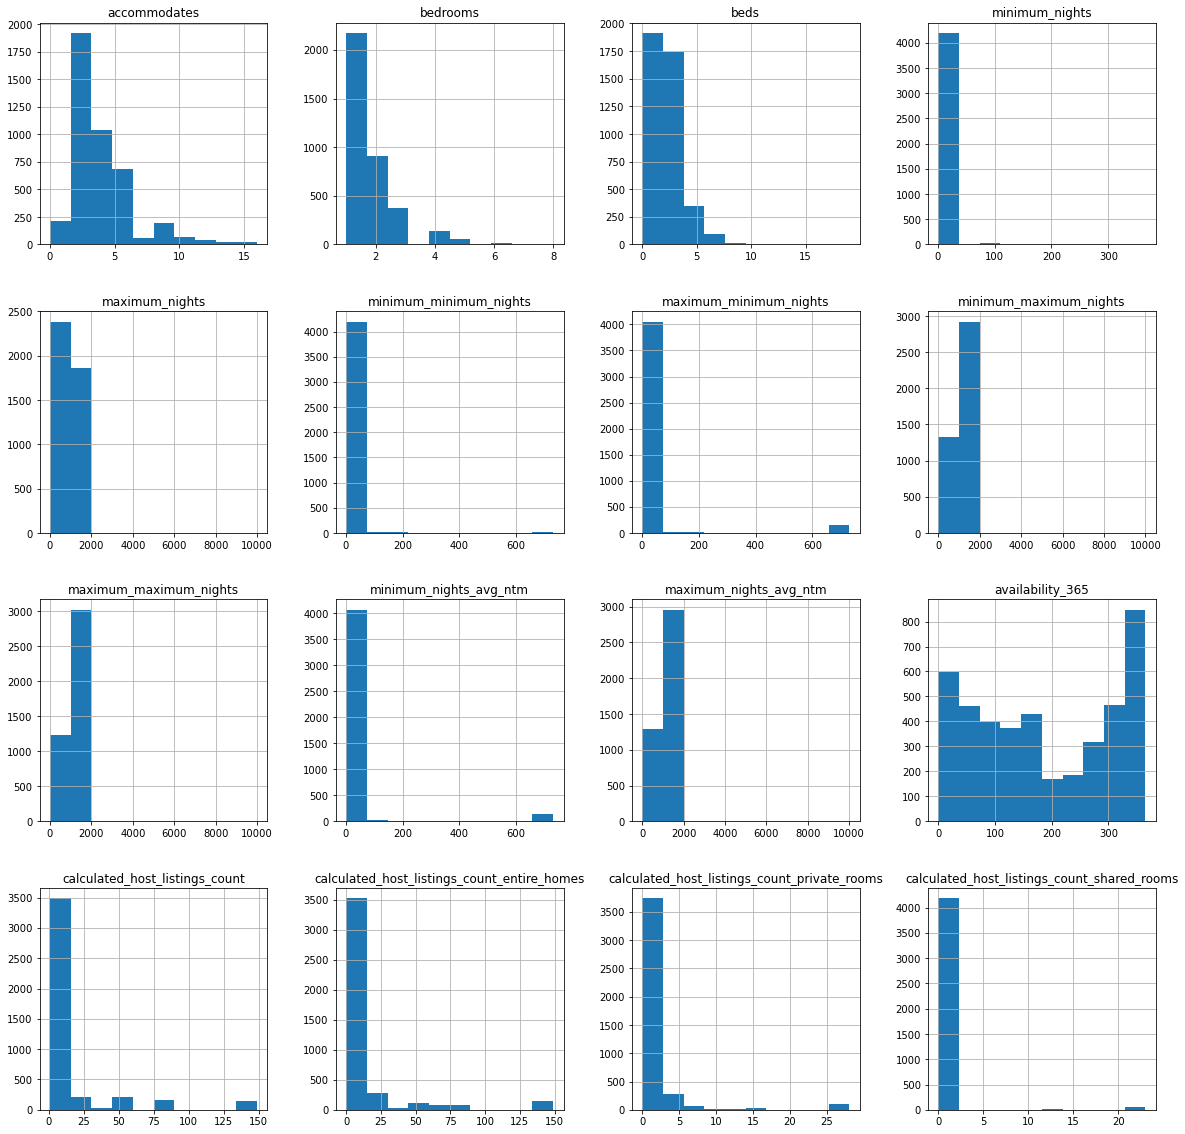

In [28]:
data_clean.hist(figsize=(20,20));

### Assess Missing Data

In [29]:
null_values_perc = data_clean.isnull().sum().sort_values(ascending=False) / len(data_clean)

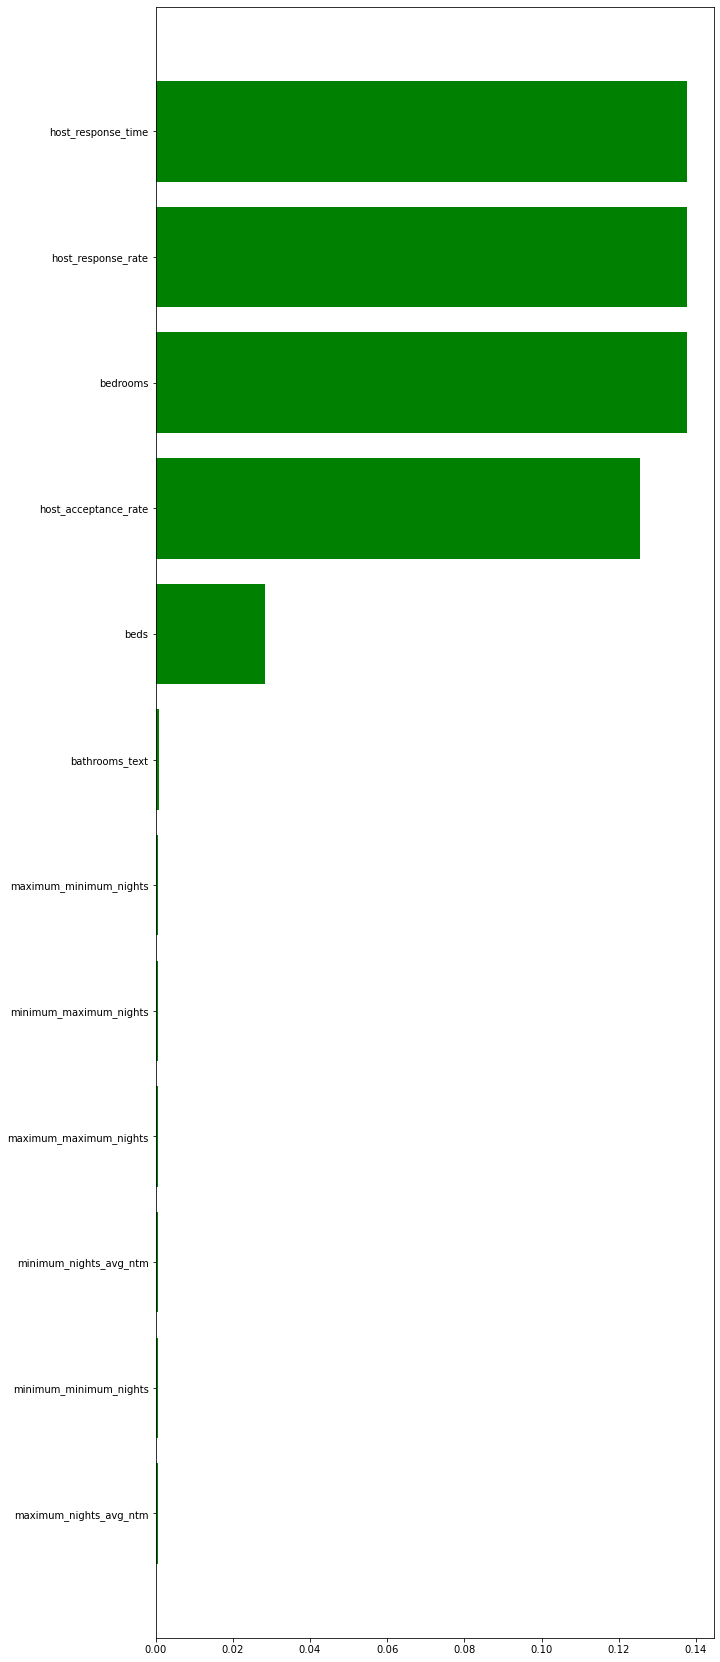

In [30]:
x = range(len(null_values_perc[null_values_perc != 0]))
y = null_values_perc[null_values_perc != 0]

plt.figure(figsize=(10,30))
ax = plt.subplot()

plt.gca().invert_yaxis()
ax.set_yticks(range(len(null_values_perc)))
ax.set_yticklabels(null_values_perc.index)

plt.barh(x, y, color='g')
plt.show()

In [31]:
# investigate missing data in rows
data_clean['Missing_num'] = data_clean.isnull().sum(axis=1)
print('{:.2f}% rows have no missing data.'.format(len(data_clean[data_clean['Missing_num']==0]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 1 missing data.'.format(len(data_clean[data_clean['Missing_num']<=1]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 2 missing data.'.format(len(data_clean[data_clean['Missing_num']<=2]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 3 missing data.'.format(len(data_clean[data_clean['Missing_num']<=3]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 4 missing data.'.format(len(data_clean[data_clean['Missing_num']<=4]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 5 missing data.'.format(len(data_clean[data_clean['Missing_num']<=5]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 6 missing data.'.format(len(data_clean[data_clean['Missing_num']<=6]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 7 missing data.'.format(len(data_clean[data_clean['Missing_num']<=7]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 8 missing data.'.format(len(data_clean[data_clean['Missing_num']<=8]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 9 missing data.'.format(len(data_clean[data_clean['Missing_num']<=9]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 10 missing data.'.format(len(data_clean[data_clean['Missing_num']<=10]) / len(data_clean) * 100))

70.75% rows have no missing data.
85.76% rows have less than 1 missing data.
88.11% rows have less than 2 missing data.
98.52% rows have less than 3 missing data.
99.93% rows have less than 4 missing data.
99.93% rows have less than 5 missing data.
99.93% rows have less than 6 missing data.
99.93% rows have less than 7 missing data.
99.93% rows have less than 8 missing data.
100.00% rows have less than 9 missing data.
100.00% rows have less than 10 missing data.


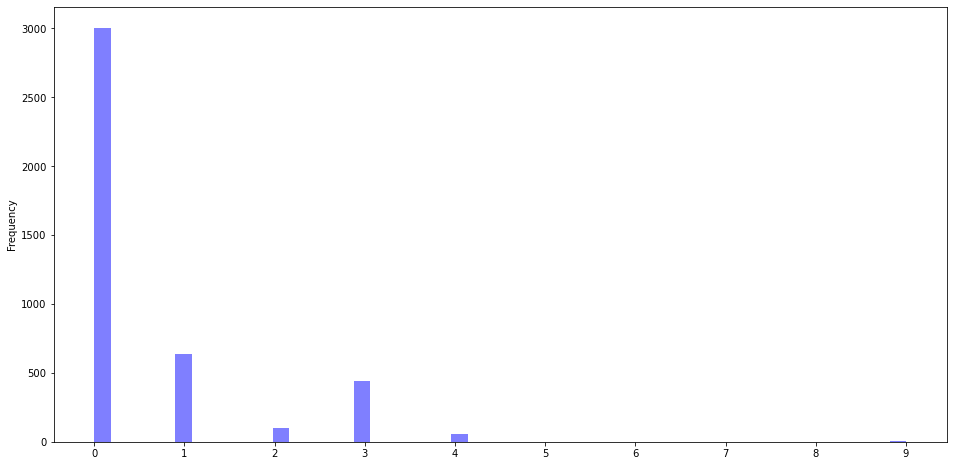

In [32]:
# show the distibution of missing data on row
plt.figure(figsize=(16,8))
plt.xticks(range(50))
data_clean['Missing_num'].plot.hist(color='b', alpha=0.5, bins=50)
plt.show()

99.84% rows have less than 5 missing data

In [33]:
# drop rows has more than 5 missing values (the 2 rows with 9 missing values)
missing_threshold = 5
data_clean = data_clean[data_clean['Missing_num']<=missing_threshold].drop('Missing_num', axis = 1)

In [34]:
data_clean.shape

(4246, 32)

### ReEncoding Features

Feature encoding is the process of turning categorical data in a dataset into numerical data. One-Hot Encoding of features is used.

In [35]:
# convert continous data from str into float
data_clean['price'] = data_clean['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')
data_clean['host_response_rate'] = data_clean['host_response_rate'].map(lambda rate: np.float(rate[:-1]) / 100, na_action='ignore')
data_clean['host_acceptance_rate'] = data_clean['host_acceptance_rate'].map(lambda rate: np.float(rate[:-1]) / 100, na_action='ignore')

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd f

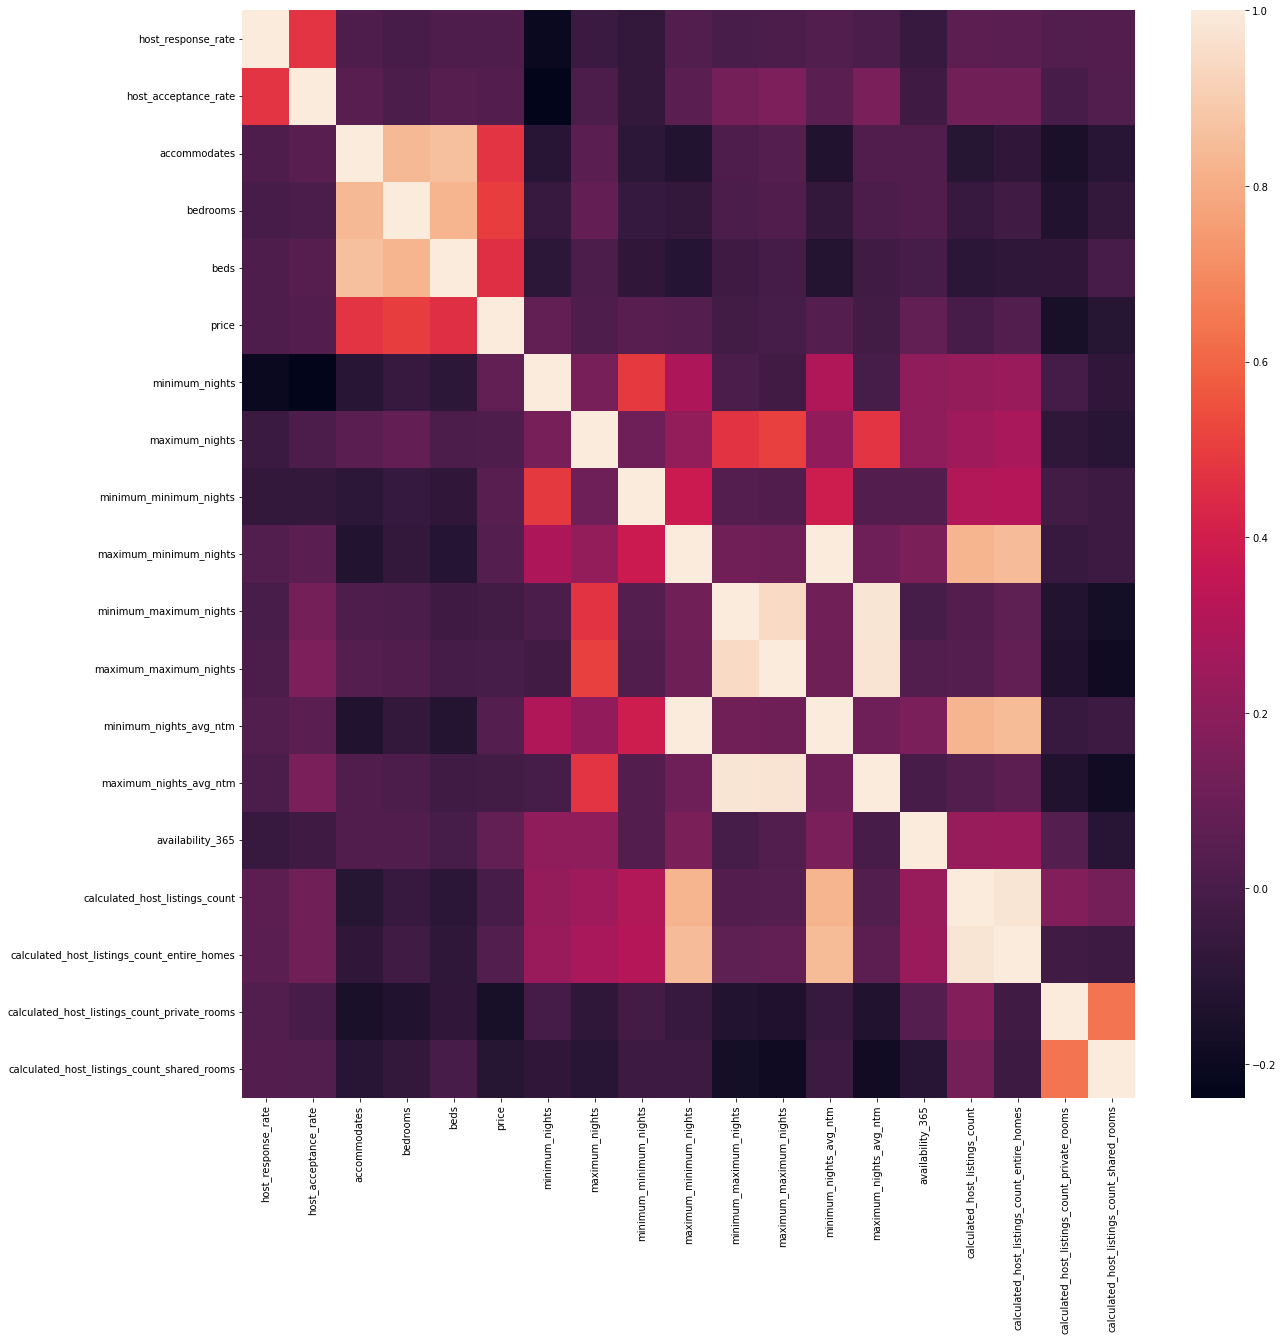

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(data_clean.corr())
plt.show()

Categorical features having less than 5 distinct categories are encoded as one hot. An array is created and remaining categorical features are stored to examine each feature carefully. If there are too many distinct categorical features, the feature is dropped.

In [37]:
def oneHot(feat, data):
    """
    encode an categorical data as one-hot
    """
    print('Ecoding {} as one-hot..'.format(feat))
    cur_dummies = pd.get_dummies(data[feat], prefix=feat)
    data.drop(feat, axis=1, inplace=True)
    data = pd.concat([data, cur_dummies], axis=1)
    return data

In [38]:
feats = []
conts = []
for feat in data_clean.columns:
    if data_clean[feat].dtype == np.float:
        print('{} is a continous varibale'.format(feat))
        # take a look which columns are float
        conts.append(feat)
    elif len(data_clean[feat].value_counts()) <= 5:
        # for categorical variables with small categories, encode them as one hot
        data_clean = oneHot(feat, data_clean)
    else:
        # if categorical variables have many distinct values, we should be more careful
        feats.append(feat)

Ecoding last_scraped as one-hot..
Ecoding host_response_time as one-hot..
host_response_rate is a continous varibale
host_acceptance_rate is a continous varibale
Ecoding host_is_superhost as one-hot..
Ecoding host_has_profile_pic as one-hot..
Ecoding host_identity_verified as one-hot..
Ecoding room_type as one-hot..
bedrooms is a continous varibale
beds is a continous varibale
price is a continous varibale
minimum_minimum_nights is a continous varibale
maximum_minimum_nights is a continous varibale
minimum_maximum_nights is a continous varibale
maximum_maximum_nights is a continous varibale
minimum_nights_avg_ntm is a continous varibale
maximum_nights_avg_ntm is a continous varibale
Ecoding calendar_last_scraped as one-hot..
Ecoding instant_bookable as one-hot..
Ecoding calculated_host_listings_count_shared_rooms as one-hot..


/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [39]:
# there are some continouns variables
print(conts)

['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds', 'price', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']


In [40]:
# there are some variables we should pay more attention on
print(feats)

['host_since', 'neighbourhood_group_cleansed', 'property_type', 'accommodates', 'bathrooms_text', 'amenities', 'minimum_nights', 'maximum_nights', 'availability_365', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms']


In [41]:
data_clean['host_since'].head()

0    2008-08-26
1    2009-04-26
2    2009-08-09
3    2009-08-13
4    2009-08-13
Name: host_since, dtype: object

In [42]:
data_clean['host_since'] = data_clean['host_since'].map(lambda date: 2021 - int(date[:4]), na_action='ignore')

In [43]:
data_clean['host_since'].value_counts()

5     747
6     678
7     506
8     433
9     367
4     360
2     329
3     214
1     202
10    160
0     154
11     49
12     44
13      3
Name: host_since, dtype: int64

In [44]:
data_clean = oneHot('host_since', data_clean)

Ecoding host_since as one-hot..


In [45]:
data_clean['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    826
Downtown               636
Capitol Hill           416
Central Area           343
West Seattle           305
Queen Anne             294
Rainier Valley         253
Ballard                220
Beacon Hill            182
University District    174
Delridge               144
Cascade                142
Northgate               97
Lake City               76
Magnolia                73
Interbay                34
Seward Park             31
Name: neighbourhood_group_cleansed, dtype: int64

In [46]:
data_clean = oneHot('neighbourhood_group_cleansed', data_clean)

Ecoding neighbourhood_group_cleansed as one-hot..


In [47]:
data_clean['property_type'].value_counts()

Entire rental unit                     1065
Entire residential home                 806
Entire guest suite                      516
Private room in residential home        439
Entire condominium (condo)              392
Entire townhouse                        218
Entire guesthouse                       185
Entire serviced apartment               183
Private room in townhouse                75
Room in boutique hotel                   58
Entire loft                              37
Private room in rental unit              37
Shared room in residential home          35
Entire cottage                           34
Private room in guest suite              32
Entire bungalow                          25
Tiny house                               16
Private room in condominium (condo)      15
Private room in bungalow                 10
Private room in bed and breakfast         8
Room in aparthotel                        6
Room in hotel                             6
Entire villa                    

In [48]:
data_clean = oneHot('property_type', data_clean)

Ecoding property_type as one-hot..


In [49]:
data_clean['accommodates'].value_counts()

2     1531
4     1037
6      452
3      386
5      230
1      206
8      167
7       56
10      52
12      39
9       30
16      19
11      17
14      14
15       5
13       5
Name: accommodates, dtype: int64

In [50]:
data_clean = oneHot('accommodates', data_clean)

Ecoding accommodates as one-hot..


In [51]:
data_clean['bathrooms_text'].value_counts()

1 bath               2612
2 baths               464
1 shared bath         260
1 private bath        231
2.5 baths             167
1.5 baths             157
2 shared baths         97
3 baths                85
3.5 baths              66
1.5 shared baths       40
3 shared baths         24
4 baths                10
0 shared baths          8
Half-bath               6
4.5 baths               4
0 baths                 4
4 shared baths          2
Shared half-bath        2
6 baths                 2
3.5 shared baths        1
16 shared baths         1
Private half-bath       1
5 baths                 1
Name: bathrooms_text, dtype: int64

In [52]:
data_clean = oneHot('bathrooms_text', data_clean)

Ecoding bathrooms_text as one-hot..


The 'amenities' column is unstructured. A list containing all amenities is created, stripped of the special characters, created a dictionary with key as amenity name and value as count of that particular amenity, sorted it and made a new list of keys with value of 500  as threshold and dropped the original columns.

In [53]:
data_clean['amenities'][0]

'["Free parking on premises", "Coffee maker", "Essentials", "Pack \\u2019n Play/travel crib", "Shampoo", "Dedicated workspace", "Backyard", "Wifi", "First aid kit", "Hair dryer", "Cooking basics", "Luggage dropoff allowed", "Dishwasher", "Children\\u2019s books and toys", "Iron", "Refrigerator", "Long term stays allowed", "Carbon monoxide alarm", "Microwave", "Kitchen", "Hangers", "Dryer", "Stove", "High chair", "Lake access", "Oven", "Fire extinguisher", "Washer", "Free street parking", "Dishes and silverware", "Heating", "Hot water", "Smoke alarm", "Patio or balcony", "Host greets you", "Indoor fireplace"]'

In [54]:
amenities_list = list(data_clean.amenities)

In [55]:
amenities_list_string = " ".join(amenities_list)

In [56]:
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_list_string = amenities_list_string.replace("'", "")
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
#amenities_set = set(amenities_set)
amenities_set

['Free parking on premises',
 'Coffee maker',
 'Essentials',
 'Pack \\u2019n Play/travel crib',
 'Shampoo',
 'Dedicated workspace',
 'Backyard',
 'Wifi',
 'First aid kit',
 'Hair dryer',
 'Cooking basics',
 'Luggage dropoff allowed',
 'Dishwasher',
 'Children\\u2019s books and toys',
 'Iron',
 'Refrigerator',
 'Long term stays allowed',
 'Carbon monoxide alarm',
 'Microwave',
 'Kitchen',
 'Hangers',
 'Dryer',
 'Stove',
 'High chair',
 'Lake access',
 'Oven',
 'Fire extinguisher',
 'Washer',
 'Free street parking',
 'Dishes and silverware',
 'Heating',
 'Hot water',
 'Smoke alarm',
 'Patio or balcony',
 'Host greets you',
 'Indoor fireplace',
 'Free parking on premises',
 'Coffee maker',
 'Essentials',
 'Extra pillows and blankets',
 'Shampoo',
 'Dedicated workspace',
 'Wifi',
 'Bed linens',
 'Hair dryer',
 'Cooking basics',
 'TV',
 'Iron',
 'Long term stays allowed',
 'Carbon monoxide alarm',
 'Air conditioning',
 'Microwave',
 'Kitchen',
 'Hangers',
 'Fire extinguisher',
 'Private ent

In [57]:
mydict = {}
for word in amenities_set:
    if word in mydict:
        mydict[word] += 1
    else:
        mydict[word] = 1
#mydict = sorted(mydict.items(), key=lambda x: x[1], reverse=True)        
print(mydict)

{'Free parking on premises': 2030, 'Coffee maker': 3299, 'Essentials': 4038, 'Pack \\u2019n Play/travel crib': 731, 'Shampoo': 3628, 'Dedicated workspace': 2991, 'Backyard': 1289, 'Wifi': 3997, 'First aid kit': 2326, 'Hair dryer': 3780, 'Cooking basics': 2822, 'Luggage dropoff allowed': 1302, 'Dishwasher': 2242, 'Children\\u2019s books and toys': 336, 'Iron': 3591, 'Refrigerator': 3124, 'Long term stays allowed': 3672, 'Carbon monoxide alarm': 3845, 'Microwave': 3251, 'Kitchen': 3735, 'Hangers': 3770, 'Dryer': 2921, 'Stove': 2330, 'High chair': 349, 'Lake access': 267, 'Oven': 2467, 'Fire extinguisher': 2974, 'Washer': 3027, 'Free street parking': 2612, 'Dishes and silverware': 3210, 'Heating': 3749, 'Hot water': 3448, 'Smoke alarm': 4168, 'Patio or balcony': 1625, 'Host greets you': 197, 'Indoor fireplace': 874, 'Extra pillows and blankets': 2162, 'Bed linens': 2828, 'TV': 2263, 'Air conditioning': 1284, 'Private entrance': 2784, 'Lock on bedroom door': 468, 'Security cameras on prope

In [58]:
threshold = 500
A = {k:v for (k,v) in mydict.items() if v > threshold }
A = list(A.keys())

# create new binary columns if one amentity exist
for a in A:
    data_clean[a] = data_clean['amenities'].apply(lambda A: 1 if a in A else 0)
#do not forget to drop orignal columns
data_clean = drop(data_clean, 'amenities')

Dropping amenities...


In [59]:
data_clean.describe()

,host_response_rate,host_acceptance_rate,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,last_scraped_2021-09-25,last_scraped_2021-09-26,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,calendar_last_scraped_2021-09-25,calendar_last_scraped_2021-09-26,instant_bookable_f,instant_bookable_t,calculated_host_listings_count_shared_rooms_0,...,Washer,Free street parking,Dishes and silverware,Heating,Hot water,Smoke alarm,Patio or balcony,Indoor fireplace,Extra pillows and blankets,Bed linens,TV,Air conditioning,Private entrance,Security cameras on property,Baking sheet,TV with standard cable,BBQ grill,Cable TV,Single level home,Shower gel,Conditioner,Portable fans,Body soap,Freezer,Bathtub,Lockbox,Smart lock,Outdoor furniture,Wine glasses,Dining table,Toaster,Cleaning products,Keypad,Room-darkening shades,Hot water kettle,Elevator,Gym
count,3661.000000,3713.000000,3664.000000,4128.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,...,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000
mean,0.966449,0.911786,1.656114,2.008479,162.961375,14.391427,572.401790,16.005652,39.650966,824.919218,850.865049,38.272445,837.303344,187.032266,14.423457,12.769430,1.325012,0.956430,0.043570,0.016251,0.051578,0.113519,0.680876,0.562883,0.437117,0.002355,0.997645,0.155440,0.844560,0.824541,0.165568,0.009892,0.956430,0.043570,0.537211,0.462789,0.982101,...,0.722091,0.615167,0.756006,0.882949,0.816062,0.981630,0.382713,0.205841,0.509185,0.666039,0.845266,0.302402,0.655676,0.267546,0.214790,0.225153,0.235045,0.238342,0.137070,0.262129,0.199717,0.190061,0.203250,0.232925,0.352803,0.246350,0.145313,0.186057,0.191710,0.198304,0.191474,0.220443,0.284974,0.204899,0.208902,0.167687,0.135186
std,0.133802,0.187290,0.996678,1.497814,141.048752,19.578560,526.405945,42.717143,133.112748,480.555679,464.236331,129.496716,470.829109,124.610351,31.417567,30.983431,4.526730,0.204161,0.204161,0.126453,0.221199,0.317263,0.466192,0.496088,0.496088,0.048478,0.048478,0.362367,0.362367,0.380404,0.371736,0.098975,0.204161,0.204161,0.498672,0.498672,0.132601,...,0.448021,0.486613,0.429540,0.321519,0.387479,0.134302,0.486106,0.404362,0.499975,0.471682,0.361693,0.459353,0.475203,0.442732,0.410725,0.417732,0.424077,0.426120,0.343962,0.439844,0.399835,0.392395,0.402464,0.422745,0.477898,0.430935,0.352458,0.389199,0.393692,0.398770,0.393508,0.414594,0.451455,0.403675,0.406572,0.373632,0.341962
min,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [60]:
# Check if NaN exist
data_clean.isnull().sum().sum()

1818

In [61]:
# Check if NaN exist
data_clean.isnull().sum()

host_response_rate                                   585
host_acceptance_rate                                 533
bedrooms                                             582
beds                                                 118
price                                                  0
minimum_nights                                         0
maximum_nights                                         0
minimum_minimum_nights                                 0
maximum_minimum_nights                                 0
minimum_maximum_nights                                 0
maximum_maximum_nights                                 0
minimum_nights_avg_ntm                                 0
maximum_nights_avg_ntm                                 0
availability_365                                       0
calculated_host_listings_count                         0
calculated_host_listings_count_entire_homes            0
calculated_host_listings_count_private_rooms           0
last_scraped_2021-09-25        

In [62]:
for col in ['host_acceptance_rate','bedrooms', 'beds', 'host_response_rate']:
    data_clean[col].fillna(data_clean[col].median(), inplace=True)

In [63]:
# Check if NaN exist
data_clean.isnull().sum()

host_response_rate                                   0
host_acceptance_rate                                 0
bedrooms                                             0
beds                                                 0
price                                                0
minimum_nights                                       0
maximum_nights                                       0
minimum_minimum_nights                               0
maximum_minimum_nights                               0
minimum_maximum_nights                               0
maximum_maximum_nights                               0
minimum_nights_avg_ntm                               0
maximum_nights_avg_ntm                               0
availability_365                                     0
calculated_host_listings_count                       0
calculated_host_listings_count_entire_homes          0
calculated_host_listings_count_private_rooms         0
last_scraped_2021-09-25                              0
last_scrap

In [64]:
data_clean.isnull().sum()

host_response_rate                                   0
host_acceptance_rate                                 0
bedrooms                                             0
beds                                                 0
price                                                0
minimum_nights                                       0
maximum_nights                                       0
minimum_minimum_nights                               0
maximum_minimum_nights                               0
minimum_maximum_nights                               0
maximum_maximum_nights                               0
minimum_nights_avg_ntm                               0
maximum_nights_avg_ntm                               0
availability_365                                     0
calculated_host_listings_count                       0
calculated_host_listings_count_entire_homes          0
calculated_host_listings_count_private_rooms         0
last_scraped_2021-09-25                              0
last_scrap

In [65]:
data_clean.isnull().sum()

host_response_rate                                   0
host_acceptance_rate                                 0
bedrooms                                             0
beds                                                 0
price                                                0
minimum_nights                                       0
maximum_nights                                       0
minimum_minimum_nights                               0
maximum_minimum_nights                               0
minimum_maximum_nights                               0
maximum_maximum_nights                               0
minimum_nights_avg_ntm                               0
maximum_nights_avg_ntm                               0
availability_365                                     0
calculated_host_listings_count                       0
calculated_host_listings_count_entire_homes          0
calculated_host_listings_count_private_rooms         0
last_scraped_2021-09-25                              0
last_scrap

In [66]:
data_clean.shape

(4246, 216)

In [67]:
listings_cleaned = data_clean.to_csv(r'listings_cleaned.csv', index=id, header=True)


In [68]:
df = pd.read_csv('listings_cleaned.csv', index_col=0)

In [69]:
df.dtypes


host_response_rate                                   float64
host_acceptance_rate                                 float64
bedrooms                                             float64
beds                                                 float64
price                                                float64
minimum_nights                                         int64
maximum_nights                                         int64
minimum_minimum_nights                               float64
maximum_minimum_nights                               float64
minimum_maximum_nights                               float64
maximum_maximum_nights                               float64
minimum_nights_avg_ntm                               float64
maximum_nights_avg_ntm                               float64
availability_365                                       int64
calculated_host_listings_count                         int64
calculated_host_listings_count_entire_homes            int64
calculated_host_listings

### Seasonal Pattern

In [70]:
def timeplot(data, feat, title):
    """
    draw a smooth line for the time series of feature
    """
    
    plt.figure(figsize=(20,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    
    # smooth y for visualization
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    # set x tick by month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.title(title)
    plt.plot(x, y_smooth, 'c-')
    plt.show()

### Seasonal Booking

In [71]:
cal['available'].value_counts()

t    803496
f    746350
Name: available, dtype: int64

In [72]:
# converting 'available' into binary
cal['available'] = cal['available'].map(lambda available: 1 if available == 't' else 0)

In [73]:
cal['available'].value_counts()

1    803496
0    746350
Name: available, dtype: int64

In [74]:
ocp = cal[['date', 'available']].groupby('date').mean()
ocp['occupancy'] = 1 - ocp['available']

In [75]:
ocp.head()

,available,occupancy
date,,
2021-09-25,0.095169,0.904831
2021-09-26,0.206547,0.793453
2021-09-27,0.268724,0.731276
2021-09-28,0.297692,0.702308
2021-09-29,0.290626,0.709374


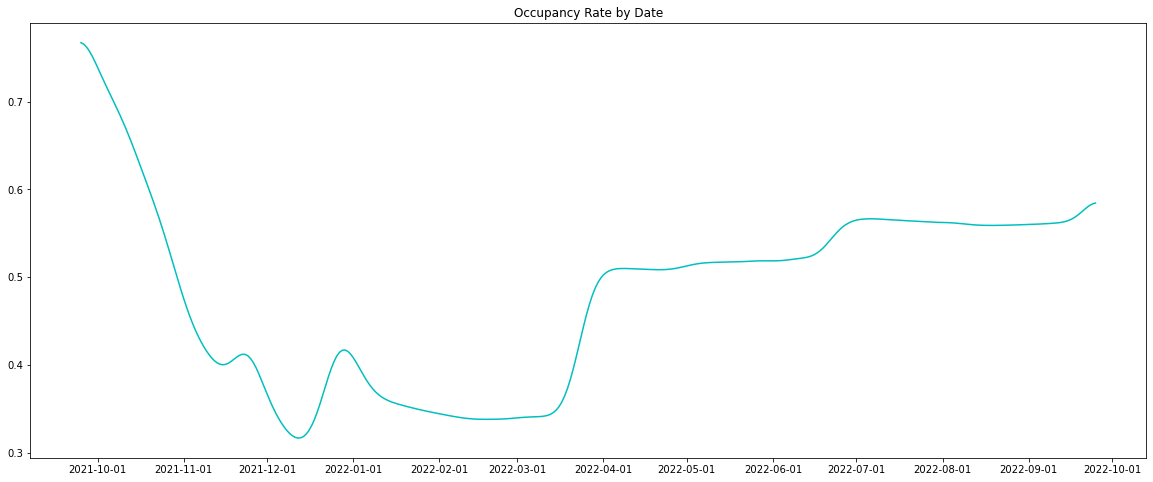

In [76]:
timeplot(ocp, 'occupancy', 'Occupancy Rate by Date')

From this we can infer that, the highest occupancy rate in the month of October, decreasing rapidly to 30 % and 10% in the months of November and December. For then it increases gradually from the month of April. This implies that Spring and Summer are the most Occupied months in Seattle. The best weather in Seattle is from late June to early October. And, in fact, there is a peak during that time.

### Seasonal Rental Price

In [77]:
# converting 'price' into float
cal['price'] = cal['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')

#### Median of Price

In [78]:
price_median = cal[['date', 'price']].groupby('date').median()

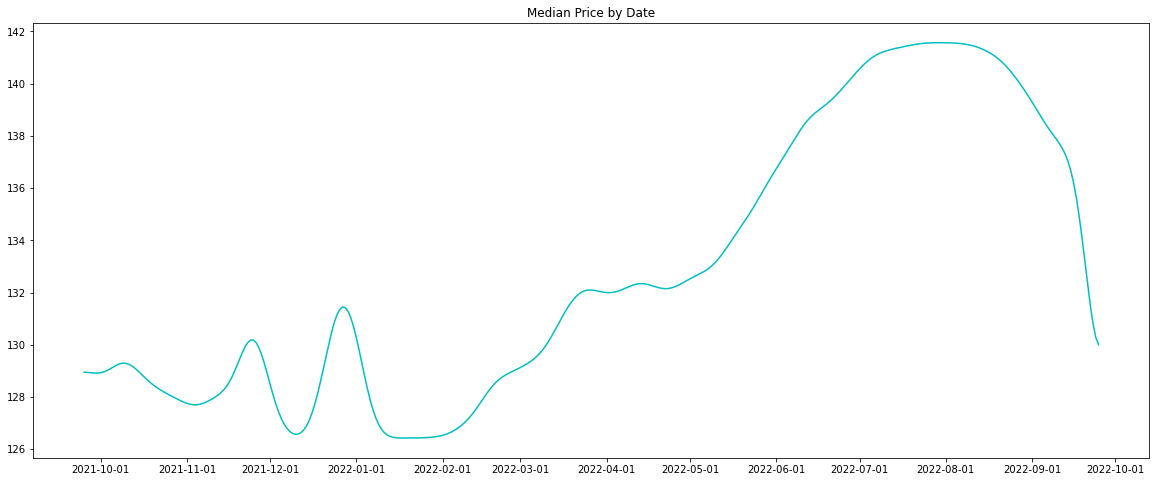

In [79]:
timeplot(price_median, 'price', 'Median Price by Date')

The rental prices are higher from May to September. During that time, Seattle usually has nice weather. It makes sense that rental prices are cheaper during rainy and winter seasons.

#### Mean of Price

The median of price shows the pattern of price better than mean, but let's take a look at the mean also.

In [80]:
price_mean = cal[['date', 'price']].groupby('date').mean()

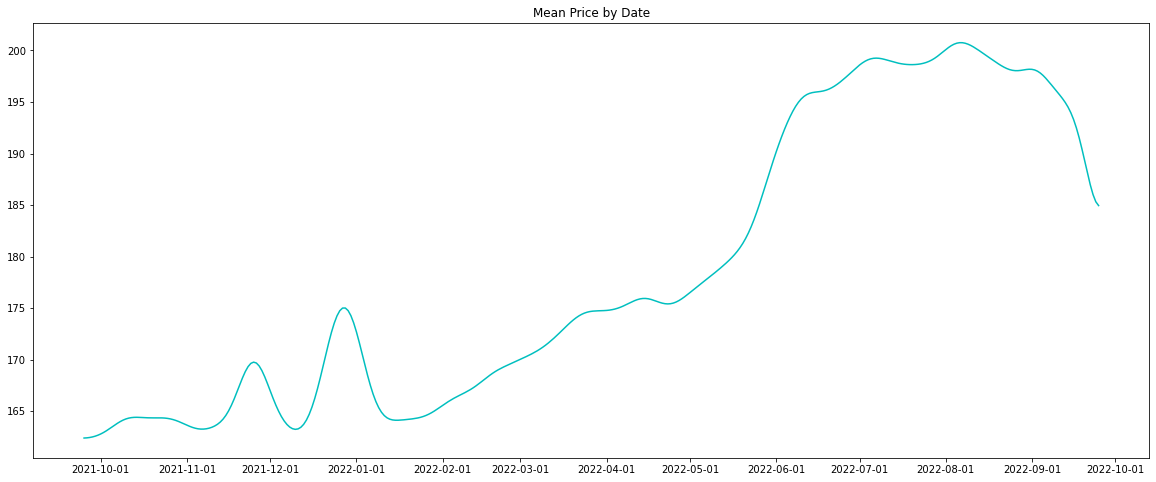

In [81]:
timeplot(price_mean, 'price', 'Mean Price by Date')

It also shows a similar pattern

### Popular Airbnb homes

In [82]:
ocp = cal[['listing_id', 'available']].groupby('listing_id').mean()
ocp['occupancy'] = 1 - ocp['available']
ocp.drop(['available'], axis = 1, inplace=True)
ocp['id'] = ocp.index

In [83]:
ocp.head()

,occupancy,id
listing_id,,
2318,0.441096,2318
6606,1.000000,6606
9419,0.057534,9419
9531,0.273973,9531
9534,0.665753,9534


In [84]:
ocp.describe()

,occupancy,id
count,4246.000000,4.246000e+03
mean,0.481561,3.178131e+07
std,0.337730,1.671203e+07
min,0.000000,2.318000e+03
25%,0.134247,1.799248e+07
50%,0.528767,3.497950e+07
75%,0.791781,4.825229e+07
max,1.000000,5.244626e+07


/Library/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


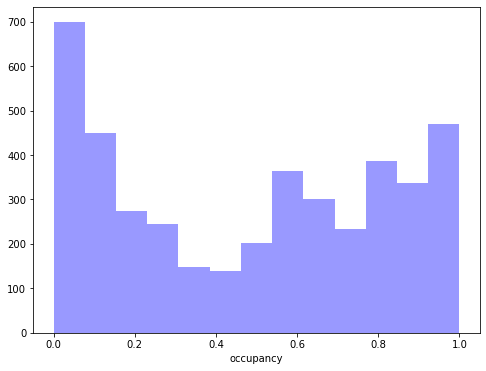

In [85]:
plt.figure(figsize=(8,6))
sns.distplot(ocp['occupancy'], color='b', kde=False)
plt.show()

Let's define the Airbnb rooms whose occupancy rates are greater than or qeual to 70% are popular.

In [86]:
threshold = 0.70

In [87]:
# join tables
data = pd.merge(ocp, lst, how='inner', left_on='id', right_on='id')

In [88]:
data.head()

,occupancy,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,...,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.441096,2318,https://www.airbnb.com/rooms/2318,20210925150558,2021-09-25,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,90%,f,https://a0.muscache.com/im/pictures/user/016a1...,https://a0.muscache.com/im/pictures/user/016a1...,Minor,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, Washington, United States",Madrona,Central Area,47.61094,-122.29286,Entire residential home,Entire home/apt,9,NaN,2.5 baths,...,4.0,"[""Free parking on premises"", ""Coffee maker"", ""...",$449.00,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,NaN,t,0,0,24,204,2021-09-25,35,3,0,2017-01-10,2021-08-07,4.97,5.00,5.00,5.00,5.00,4.97,4.82,STR-OPLI-19-002837,t,1,1,0,0,0.61
1,1.000000,6606,https://www.airbnb.com/rooms/6606,20210925150558,2021-09-25,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,https://www.airbnb.com/users/show/14942,Joyce,2009-04-26,"Seattle, Washington, United States",I am a therapist/innkeeper.I know my city well...,within an hour,100%,92%,f,https://a0.muscache.com/im/users/14942/profile...,https://a0.muscache.com/im/users/14942/profile...,Wallingford,5,5,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Seattle, Washington, United States",Wallingford,Other neighborhoods,47.65444,-122.33629,Entire guesthouse,Entire home/apt,2,NaN,1 bath,...,1.0,"[""Free parking on premises"", ""Coffee maker"", ""...",$99.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,0,2021-09-25,157,8,2,2016-05-30,2021-09-14,4.60,4.67,4.67,4.82,4.76,4.88,4.56,str-opli-19-002622,f,1,1,0,0,2.42
2,0.057534,9419,https://www.airbnb.com/rooms/9419,20210925150558,2021-09-25,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,Angielena,2009-08-09,"Seattle, Washington, United States",I am a visual artist who is the director of ...,within a few hours,100%,87%,t,https://a0.muscache.com/im/users/30559/profile...,https://a0.muscache.com/im/users/30559/profile...,Georgetown,9,9,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, Washington, United States",Georgetown,Other neighborhoods,47.55017,-12

In [89]:
def comparePlot(feat):
    """
    draw a plot to compare feature of popular and unpopular homes
    """
    
    plt.figure(figsize=(8,6))
        
    # if not float, draw bar plot
    if data[feat].dtype != np.float:
        # build a tempary DataFrame for using seaborn easily
        # includes 3 columns: occupancy, popularity and index
        cnt_popular = data[data['occupancy'] >= threshold][feat].value_counts()
        cnt_unpopular = data[data['occupancy'] < threshold][feat].value_counts()
        fre_popular = pd.DataFrame(cnt_popular / sum(cnt_popular))
        fre_popular['popularity'] = 'Popular'
        fre_popular['index'] = fre_popular.index
        fre_unpopular = pd.DataFrame(cnt_unpopular / sum(cnt_unpopular))
        fre_unpopular['popularity'] = 'Unpopular'
        fre_unpopular['index'] = fre_unpopular.index
        
        plot_data = pd.concat([fre_popular, fre_unpopular], ignore_index=True)
        sns.barplot(x='index', y=feat, hue='popularity', data=plot_data, palette='GnBu')
        plt.xticks(rotation='vertical')
        plt.legend(loc=1)
    
    # if float, draw kde line
    else:
        sns.kdeplot(data[feat][data['occupancy'] >= threshold], color='m')
        sns.kdeplot(data[feat][data['occupancy'] < threshold], color='c')
        plt.legend(['Popular', 'Unpopular'], loc=1)
    
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    
    plt.show()

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


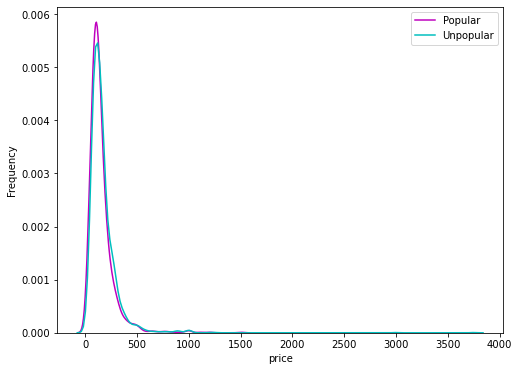

In [90]:
# price
data['price'] = data['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')
comparePlot('price')

Then, we drew the comparison distributions about host response time, property type, neighborhood, and cancellation policy — It shows what kinds of Airbnb Homes are more popular than others.

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


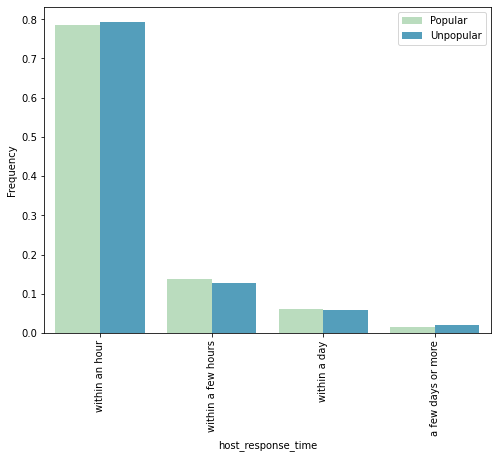

In [91]:
# host response time
comparePlot('host_response_time')

If host can respond sooner, they will have more chance to rent

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


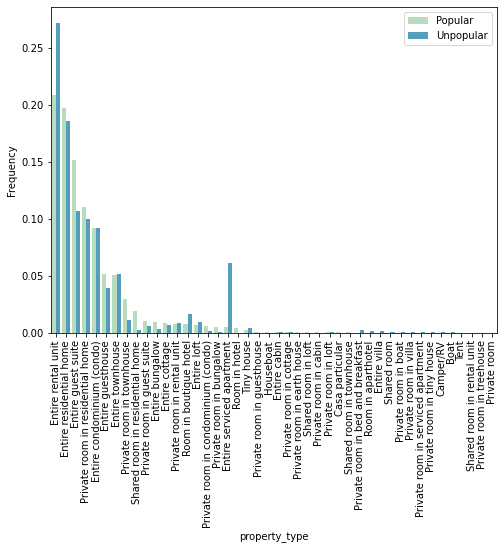

In [92]:
# property type
comparePlot('property_type')

In [93]:
#It is obvious that people prefer apartments to houses.

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


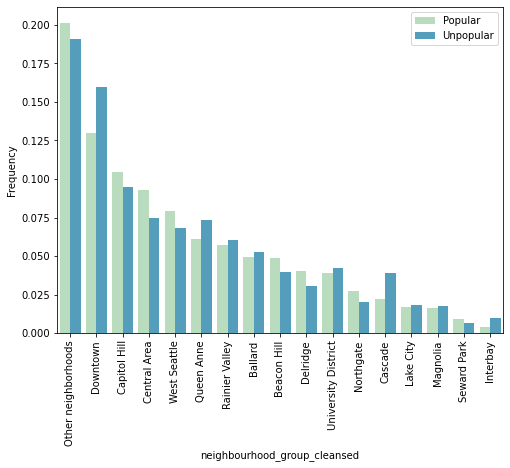

In [94]:
# neighbourhood
comparePlot('neighbourhood_group_cleansed')

Capitol Hill is very popular, while Ballard is significantly unpopular.Capitol Hill is a densely populated, residential district in Seattle, Washington, United States. It is one of the city’s most prominent nightlife and entertainment districts and is the center of the city’s LGBT counterculture communities.

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


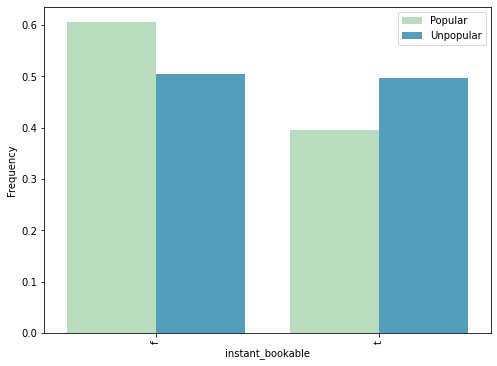

In [95]:
# booking
comparePlot('instant_bookable')

The listing which gets booked early would be the most popular.

### Feature Scaling

In [96]:
from sklearn import preprocessing as p
scaler = p.StandardScaler()
columns = data_clean.columns
data_clean = scaler.fit_transform(data_clean)
data_clean = pd.DataFrame(data_clean)
data_clean.columns = columns

In [97]:
data_clean.head()

,host_response_rate,host_acceptance_rate,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,last_scraped_2021-09-25,last_scraped_2021-09-26,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,calendar_last_scraped_2021-09-25,calendar_last_scraped_2021-09-26,instant_bookable_f,instant_bookable_t,calculated_host_listings_count_shared_rooms_0,...,Washer,Free street parking,Dishes and silverware,Heating,Hot water,Smoke alarm,Patio or balcony,Indoor fireplace,Extra pillows and blankets,Bed linens,TV,Air conditioning,Private entrance,Security cameras on property,Baking sheet,TV with standard cable,BBQ grill,Cable TV,Single level home,Shower gel,Conditioner,Portable fans,Body soap,Freezer,Bathtub,Lockbox,Smart lock,Outdoor furniture,Wine glasses,Dining table,Toaster,Cleaning products,Keypad,Room-darkening shades,Hot water kettle,Elevator,Gym
0,0.231866,-0.122039,2.554299,1.348811,2.028180,-0.377571,1.049880,-0.210845,-0.245317,0.624519,0.590577,-0.241521,0.611115,0.136182,-0.427310,-0.379907,-0.292743,0.213437,-0.213437,-0.128526,-0.233201,-0.357848,0.684614,0.881232,-0.881232,-0.048587,0.048587,-0.429009,0.429009,0.461299,-0.445443,-0.099952,0.213437,-0.213437,-1.077411,1.077411,0.135002,...,0.620376,0.790933,0.568103,0.3641,0.47476,0.136799,1.270009,1.964211,-1.018542,-1.412217,-2.337244,-0.658400,-1.379942,-0.604378,-0.523016,-0.539052,-0.554316,-0.559397,-0.398551,-0.596029,-0.499558,-0.484418,-0.505073,-0.551048,-0.738325,-0.57173,-0.412334,-0.478109,-0.487011,-0.497349,-0.486641,-0.53177,-0.631309,-0.507643,-0.513874,-0.448856,-0.395371
1,0.231866,-0.009060,-0.594207,-0.682779,-0.453523,-0.581900,1.049880,-0.304496,-0.275370,0.624519,0.590577,-0.272413,0.611115,-1.501114,-0.427310,-0.379907,-0.292743,0.213437,-0.213437,-0.128526,-0.233201,-0.357848,0.684614,0.881232,-0.881232,-0.048587,0.048587,-0.429009,0.429009,0.461299,-0.445443,-0.099952,0.213437,-0.213437,0.928151,-0.928151,0.135002,...,-1.611926,-1.264330,0.568103,0.3641,0.47476,0.136799,-0.787396,-0.509110,0.981795,0.708106,0.427854,1.518833,0.724668,-0.604378,-0.523016,-0.539052,-0.554316,-0.559397,-0.398551,-0.596029,-0.499558,-0.484418,-0.505073,-0.551048,-0.738325,-0.57173,-0.412334,-0.478109,-0.487011,-0.497349,-0.486641,-0.53177,-0.631309,-0.507643,-0.513874,-0.448856,-0.395371
2,0.231866,-0.291508,-0.594207,-0.005582,-0.623697,-0.632983,-0.745524,-0.327908,-0.282884,-1.342186,-1.445264,-0.280136,-1.396219,1.259817,-0.172645,-0.412186,1.695682,0.213437,-0.213437,-0.128526,-0.233201,2.794482,-1.460678,-1.134776,1.134776,-0.048587,0.048587,-0.429009,0.429009,-2.167794,2.244956,-0.099952,0.213437,-0.213437,0.928151,-0.928151,0.135002,...,0.620376,0.790933,0.568103,0.3641,0.47476,0.136799,1.270009,-0.509110,0.981795,0.708106,-2.337244,1.518833,-1.379942,1.654592,-0.523016,-0.539052,-0.554316,-0.559397,-0.398551,-0.596029,-0.499558,-0.484418,-0.505073,-0.551048,-0.738325,-0.57173,-0.412334,-0.478109,-0.487011,-0.497349,-0.486641,-0.53177,-0.631309,-0.507643,-0.513874,-0.448856,-0.395371
3,0.231866,-1.647256,0.455295,0.671614,0.078270,-0.581900,1.049880,-0.304496,-0.275370,0.624519,0.590577,-0.272413,0.611115,0.625766,-0.395477,-0.347628,-0.292743,0.213437,-0.213437,-0.128526,4.288138,-0.357848,-1.460678,-1.134776,1.134776,-0.048587,0.048587,-0.429009,0.429009,0.461299,-0.445443,-0.099952,0.213437,-0.213437,0.928151,-0.928151,0.135002,...,0.620376,0.790933,0.568103,0.3641,0.47476,0.136799,1.270009,1.964211,0.98

### Model Training

Now that the data preprocessing is over, we can start applying different Supervised Machine Learning models. We will compare two models:

A Spatial Hedonic Price Model (OLS Regression), with the LinearRegression from Scikit-Learn library The Gradient Boosting method, with the XGBRegressor from the XGBoost library The evaluation metrics used will be mean squared error (for loss) and r-squared (for accuracy).



In [98]:
X = drop(data_clean, 'price')
y = data_clean['price']

Dropping price...


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

def train(model,s):
    
    x=model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    plt.scatter(y_test_pred, y_test, alpha=.75, color='r')
    
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title(s)
    plt.show()
    mse = mean_squared_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    print('For training data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print('For test data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

#### Linear Regression

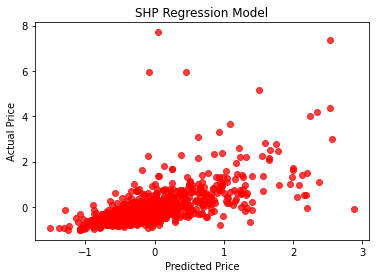

For training data, mean squared error: 0.6300, R2: 0.4050
For test data, mean squared error: 0.4652, R2: 0.3912


In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr,'SHP Regression Model')

We can try using Ridge Regularization to decrease the influence of less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features.

We’ll once again instantiate the model. The Ridge Regularization model takes a parameter, alpha , which controls the strength of the regularization.

We’ll experiment by looping through a few different values of alpha, and see how this changes our results.

#### Ridge Regression

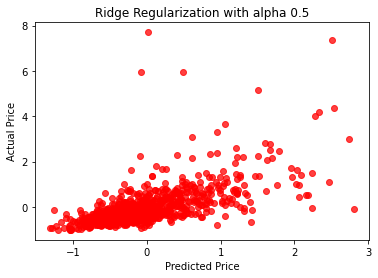

For training data, mean squared error: 0.6290, R2: 0.4060
For test data, mean squared error: 0.4663, R2: 0.3898


In [102]:
from sklearn.linear_model import Ridge
rr1 = Ridge(alpha=0.5)
train(rr1,'Ridge Regularization with alpha 0.5' )

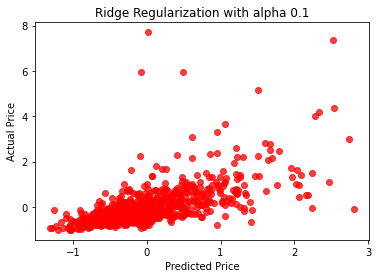

For training data, mean squared error: 0.6290, R2: 0.4060
For test data, mean squared error: 0.4663, R2: 0.3898


In [103]:
rr2 = Ridge(alpha=0.1)
train(rr2,'Ridge Regularization with alpha 0.1')

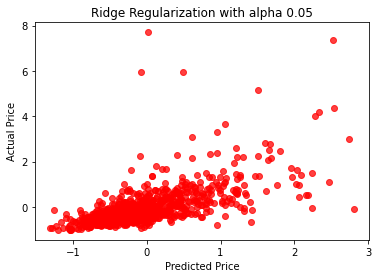

For training data, mean squared error: 0.6290, R2: 0.4060
For test data, mean squared error: 0.4663, R2: 0.3898


In [104]:
rr3 = Ridge(alpha=0.05)
train(rr3,'Ridge Regularization with alpha 0.05')

#### Lasso Regression

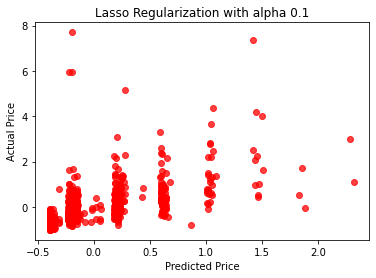

For training data, mean squared error: 0.7882, R2: 0.2556
For test data, mean squared error: 0.5232, R2: 0.3153


In [105]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=0.1)
train(lasso1,'Lasso Regularization with alpha 0.1')

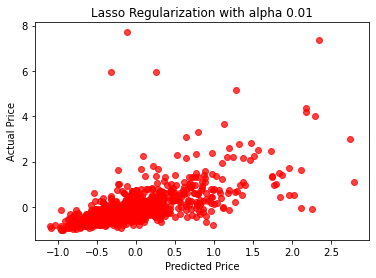

For training data, mean squared error: 0.6496, R2: 0.3865
For test data, mean squared error: 0.4536, R2: 0.4064


In [106]:
lasso2 = Lasso(alpha=0.01)
train(lasso2,'Lasso Regularization with alpha 0.01')

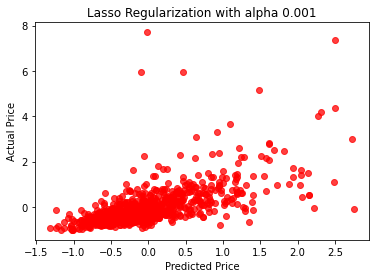

For training data, mean squared error: 0.6296, R2: 0.4054
For test data, mean squared error: 0.4623, R2: 0.3950


In [107]:
lasso3 = Lasso(alpha=0.001)
train(lasso3,'Lasso Regularization with alpha 0.001')

In [108]:
coef = rr2.coef_
# to get the order of index
ind = np.argsort(-abs(coef))

In [109]:
X.columns[ind][:30]

Index(['minimum_nights_avg_ntm', 'bedrooms', 'maximum_minimum_nights',
       'bathrooms_text_3.5 baths', 'minimum_nights', 'maximum_nights_avg_ntm',
       'bathrooms_text_2 baths', 'room_type_Entire home/apt',
       'room_type_Private room', 'property_type_Private room in boat',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'bathrooms_text_2.5 baths', 'host_response_time_a few days or more',
       'TV with standard cable', 'Security cameras on property',
       'maximum_maximum_nights', 'neighbourhood_group_cleansed_Downtown',
       'Dishes and silverware', 'Hot water', 'host_since_7',
       'bathrooms_text_3 baths', 'Body soap', 'Essentials',
       'neighbourhood_group_cleansed_Queen Anne', 'accommodates_1',
       'bathrooms_text_4 baths', 'Cable TV', 'Indoor fireplace',
       'neighbourhood_group_cleansed_Beacon Hill'],
      dtype='object')

#### Bar plot with coefficeint of features in desending order of absolute value

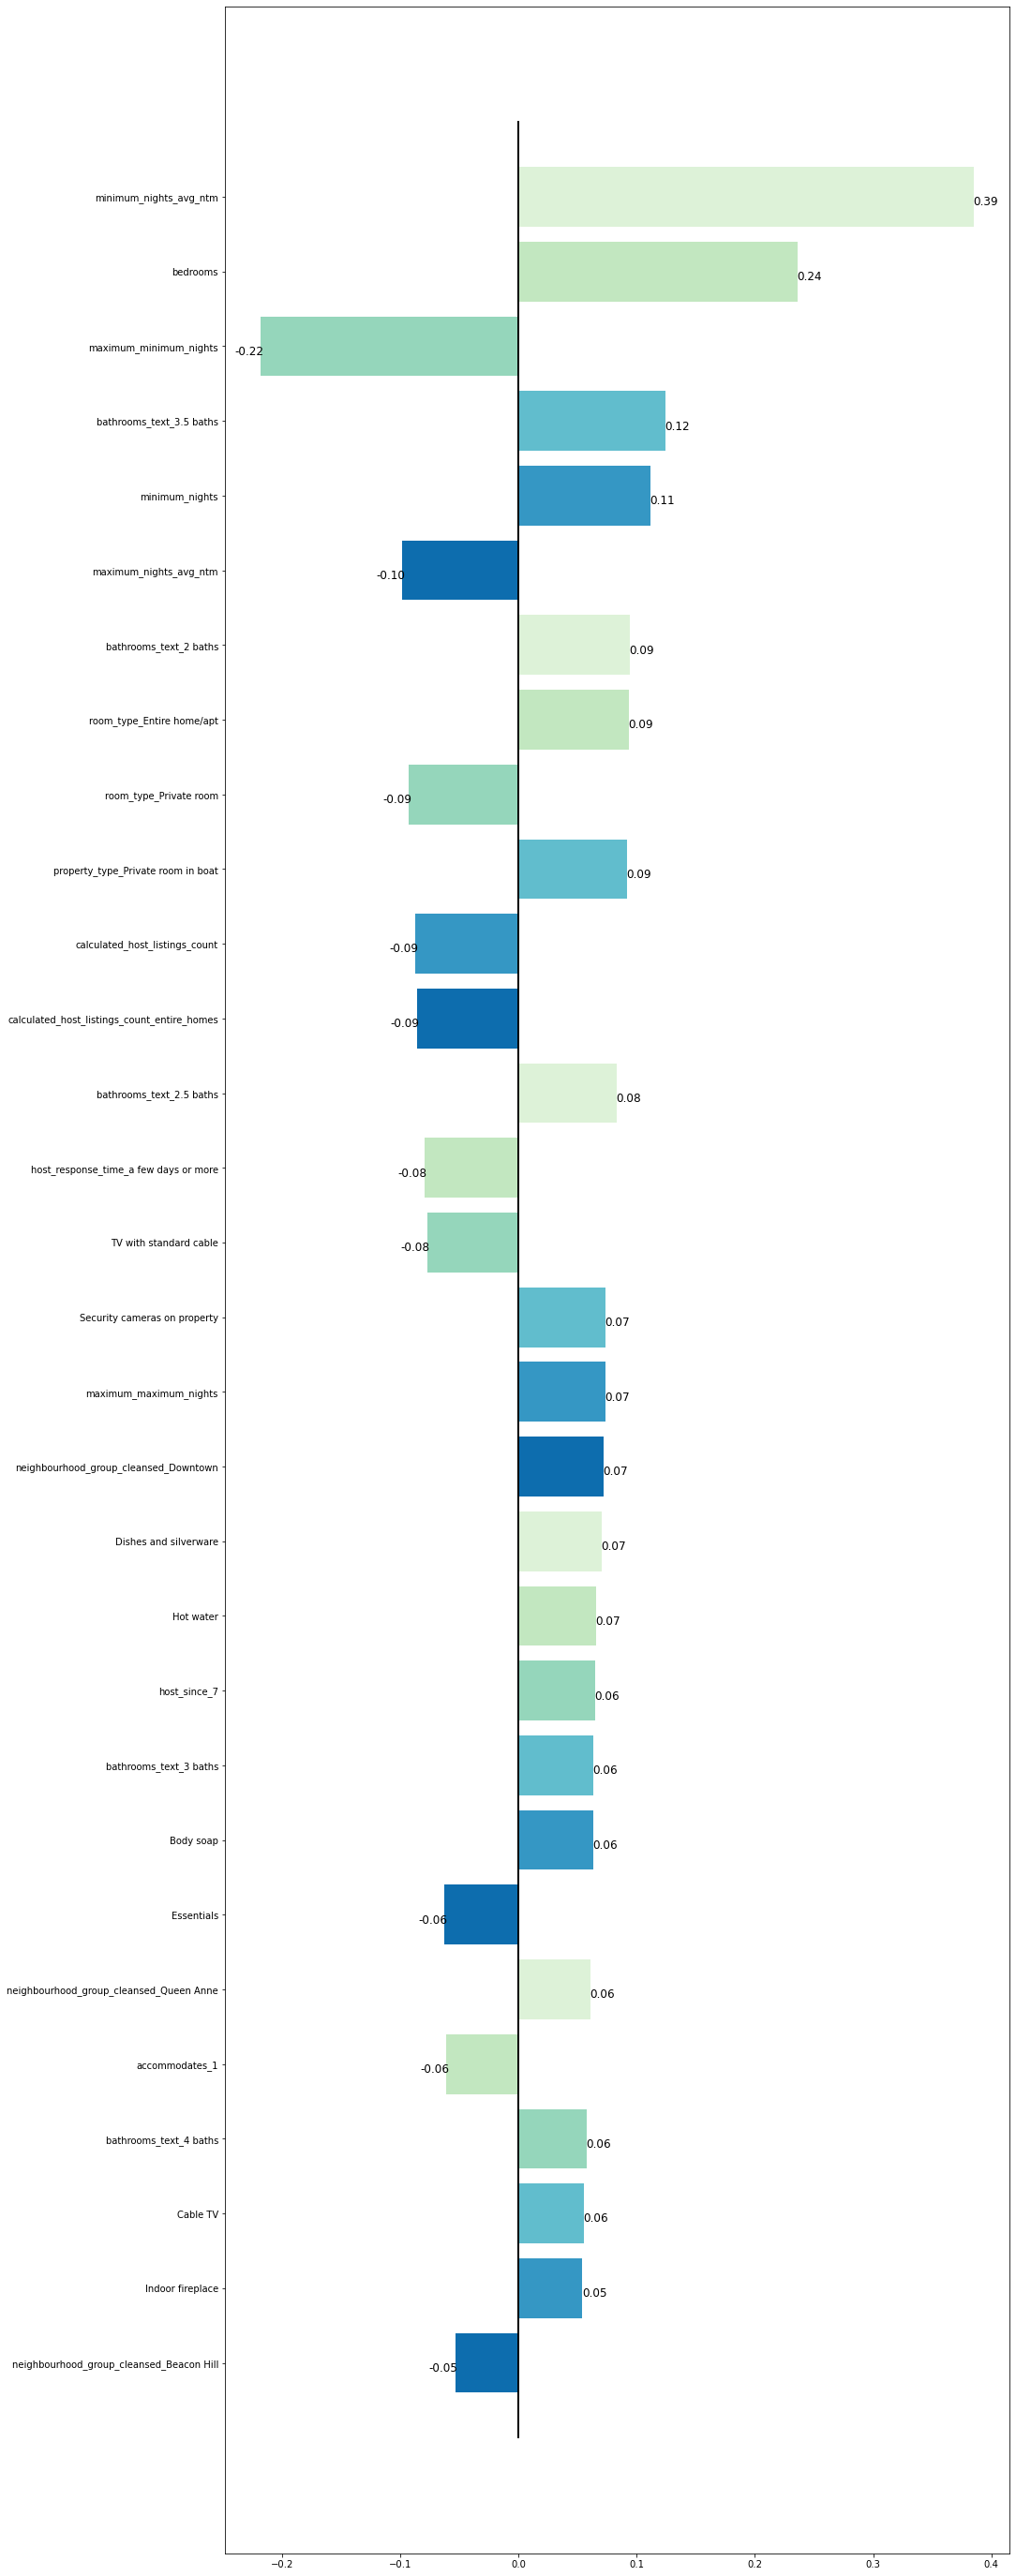

In [110]:
x = range(30)
y = coef[ind][:30]
    
plt.figure(figsize=(15,50))
ax = plt.subplot()
    
# draw a vertical black line in the middle
plt.plot([0] * (32), range(-1,31), 'k', linewidth=2)

# invert y axis
plt.gca().invert_yaxis()
ax.set_yticks(x)
ax.set_yticklabels(X.columns[ind][:30])

plt.barh(x, y, color=sns.color_palette('GnBu'))

# adjust position
for rect, label in zip(ax.patches, y):
    if label >= 0:
        width = rect.get_width() + 0.01
    else:
        width = rect.get_width() - 0.01
    label = '{:.2f}'.format(label)
    ax.text(width, rect.get_y()+0.55, label, ha='center', va='bottom', fontsize=12)
    
plt.show()

In [111]:
import sys
print(sys.base_prefix)

/Library/anaconda3


#### XGBoost Model

In [112]:
import xgboost as xgb
from xgboost import plot_importance


In [113]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

NameError: name 'time' is not defined

In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg.head(10)

In [ ]:
plt.figure(figsize=(10,35))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

Improving models
In the 'Preparing the data for modeling' section above, it was noted that a lot of the review columns are reasonably highly correlated with each other. They were left in to see whether they would be useful after all. However, the feature importances graph produced by the XGBoost model suggest that they were of relatively low importance.

This model will drop review columns other than the overall review rating, and use the same Hedonic regression and XGBoost structure, in order to see whether this produces a better models.

Columns will be dropped from the existing X_train and X_test split, for consistency.

In [ ]:
all_review = list(X_train.columns[X_train.columns.str.startswith("review_scores")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("review_scores_rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)
X_test_short = X_test.drop(review_to_drop, axis=1)

In [ ]:
X_train_short.columns

In [ ]:
hpm_reg_start = time.time()

# Create instance of the model, `LinearRegression` function from 
# Scikit-Learn and fit the model on the training data:

hpm_reg2 = LinearRegression()  
hpm_reg2.fit(X_train_short, y_train) #training the algorithm

# Now that the model has been fit we can make predictions by calling 
# the predict command. We are making predictions on the testing set:
training_preds_hpm_reg2 = hpm_reg2.predict(X_train_short)
val_preds_hpm_reg2 = hpm_reg2.predict(X_test_short)

hpm_reg_end = time.time()

print(f"Time taken to run: {round((hpm_reg_end - hpm_reg_start)/60,1)} minutes")

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg2),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg2),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg2),4))
print("Validation r2:", round(r2_score(y_test, val_preds_hpm_reg2),4))

In [ ]:
xgb_reg_start = time.time()

xgb_reg2 = xgb.XGBRegressor()
xgb_reg2.fit(X_train_short, y_train)
training_preds_xgb_reg2 = xgb_reg2.predict(X_train_short)
val_preds_xgb_reg2 = xgb_reg2.predict(X_test_short)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg2),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg2),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg2),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg2),4))